# Exercise 2: Bass information diffusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# number of time steps 
T = 20

# number of users 
N = 100

# parameters 
alpha = 0.5
beta = 1e-4
gamma = 0.5

In [3]:
# determinstic Bass model
deterministic_X = np.zeros(T+1) # store latent states
deterministic_X[0] = 0 # initial time 
    
# forward in time 
for t in range(T):
    probability = alpha + beta * deterministic_X[t] / N 
    deterministic_X[t+1] = deterministic_X[t] + (N - deterministic_X[t]) * probability


In [4]:
# stochastic Bass model
X = np.zeros(T+1) # store latent states
Y = np.zeros(T+1) # store observations

# initial time 
X[0] = 0
Y[0] = 0
    
# forward in time 
for t in range(T):
    probability = alpha + beta * X[t] / N 
    epsilon = np.random.binomial(N - X[t], probability) # simulated increment 
    X[t+1] = X[t] + epsilon 
    Y[t+1] = np.random.binomial(X[t+1], gamma) 


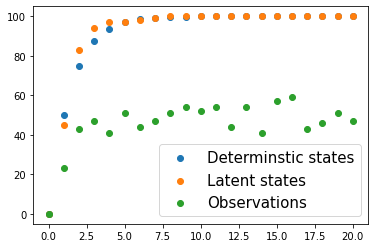

In [5]:
# plot simulated 
time = np.arange(T+1)
plt.scatter(time, deterministic_X) 
plt.scatter(time, X) 
plt.scatter(time, Y) 
plt.legend(["Determinstic states", "Latent states", "Observations"], fontsize = 15) 

# Both simulated Bass processes look close 